In [1]:
# ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# import PreProcessing functions
import sys 
import os
sys.path.append(os.path.abspath("C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\advanced_House_Price_Prediction-Regression\\preProcessingObjects_list"))
from advanced_House_Price_Prediction_PreProcessing import *


# deplyment libraries
import pickle

# Importing required framework libraries
import pandas as pd
import numpy as np

# Import required pipeline and transformation libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import processing and evaluation libraries
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import GridSearchCV

# Regressors for Data
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Regressors for Imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

## for feature slection
from sklearn.feature_selection import SelectFromModel

## for metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#fit evaluation
from sklearn.model_selection import learning_curve

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# Import UnProcessed features

In [7]:
#Import training features
import pathlib
path_to_read_model = 'C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\advanced_House_Price_Prediction-Regression\\probleam_study' #Path of current working Directory
with open(path_to_read_model + '\\trainFeatures_list.pkl', 'rb') as f:
    X, y = pickle.load(f)

# Model Validation on Training Data

## Verify the match of the Processed Data column Names

In [3]:
#Import testing features
import pathlib
path_to_read_model = 'C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\advanced_House_Price_Prediction-Regression\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\feature_ColumnNames.pkl', 'rb') as f:
    feature_ColumnNames = pickle.load(f)

In [8]:
X.columns == feature_ColumnNames

array([ True,  True,  True,  True,  True,  True,  True,  True])

## load Data PreProcessing

In [5]:
# Define a function to apply the imported functions
def preProcessing(featureDF, targetDF, function_list):
    for function in function_list:
        featureDF, targetDF = function(featureDF, targetDF)
    return featureDF, targetDF

X, y = preProcessing(X, y, [Transformations, outlierRemoval])

column: size, lower_limit: 0.5, upper_limit: 4.5
column: total_sqft, lower_limit: 215.0, upper_limit: 2575.0
column: bath, lower_limit: 0.5, upper_limit: 4.5
column: balcony, lower_limit: -0.5, upper_limit: 3.5


## Encoding and Modeling

In [6]:
#Import testing features
import pathlib
path_to_read_model = 'C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\advanced_House_Price_Prediction-Regression\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\estimators.pkl', 'rb') as f:
    ct_O, best_algos = pickle.load(f)

In [7]:
X[X.columns] = ct_O.transform(X)

In [8]:
best_algos

{'RandomForestRegressor': {'best_estimator': Pipeline(steps=[('ct_ohe_sca',
                   ColumnTransformer(transformers=[('pp_catN',
                                                    Pipeline(steps=[('col_catN',
                                                                     SimpleImputer(fill_value='missing',
                                                                                   strategy='constant')),
                                                                    ('catN',
                                                                     OneHotEncoder(handle_unknown='ignore',
                                                                                   sparse=False))]),
                                                    ['availability', 'location']),
                                                   ('pp_num',
                                                    Pipeline(steps=[('scaler',
                                                           

## Random Forest Regressor on Training Data

In [9]:
# Get the object of the Best RandomForestRegressor Algorithm with the best params
be_RF = best_algos['RandomForestRegressor']['best_estimator']

In [10]:
# View the model coeeficients
#be_RF.named_steps['model'].coef_ #coef_ and intercept_ represents the hyperplane. RandomForestRegressor uses instead identify a set of decisions based on the inputs.

In [14]:
# View the model intercept
#be_RF.named_steps['model'].intercept_ #No intercept has model is Desicion Tree based.

In [20]:
be_RF.score(X, y) #Default is explained_variance_score

0.7758260290162082

## Model evaluation metrics RandomForestRegressor

In [16]:
y_pred_RF = be_RF.predict(X)

In [26]:
## Mean of Predicted and True Targets
print("mean of Predicted values: ",np.mean(y_pred_RF, axis = None))
print("mean of True values: ",np.mean(y, axis = None))

mean of Predicted values:  82.89575425491685
mean of True values:  83.17977396449703


### Using explained_variance_score 
Also called adjusted R2. Best value is 1, values close to 0 means less effcient model  
If y_pred is the estimated target output, y the corresponding (correct) target output, and VAR is Variance, the square of the standard deviation, then the explained variance is estimated as 1-VAR(y-y_pred)/VAR(y)  

In [19]:
explained_variance_score(y, y_pred_RF)

0.7758446661049048

### Using max_error  
 max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value.  

In [9]:
max_error(y, y_pred_RF)

NameError: name 'y_pred_RF' is not defined

## Using neg_root_mean_squared_error  
Sum of squareroot of Squared differences between the actual and predicted values divided by the number of samples  

In [29]:
mean_squared_error(y, y_pred_RF, squared=False)

31.149568532811717

### Using R2(r2_score)  
Best value is 1, values close to 0 means less effcient model  
If y_pred is the estimated target output, y the corresponding (correct) target output, and VAR is Variance, the square of the standard deviation, then the explained variance is estimated as 1-VAR(y-y_pred)/VAR(y-y_mean)  
Take VAR(y-y_mean) as the base line. which means y_mean as a constant prediction for all values of the features  

In [32]:
r2_score(y, y_pred_RF)

0.7758260290162082

## Fit evaluation using learning Curve

### learning curve for neg_mean_squared_error

In [33]:
X.shape


(4225, 7)

In [35]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = be_RF,
X = X,
y = y, cv = 5,
scoring = 'neg_mean_squared_error') #optionally can pass train_sizes = train_sizes for custom training sizes

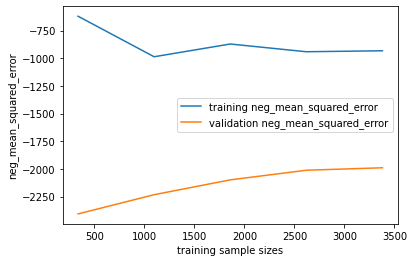

In [42]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training neg_mean_squared_error')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation neg_mean_squared_error')
plt.xlabel('training sample sizes')
plt.ylabel('neg_mean_squared_error')
plt.legend()
# indicates overfiting and high variance
# Ovefiting occurs when: High training accuracy, low validation accuracy, Gap/Non-convergent trends between the training and validation curves=> Learnt from the noise.

### learning curve for explained_variance

In [43]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = be_RF,
X = X,
y = y, cv = 5,
scoring = 'explained_variance') #optionally can pass train_sizes = train_sizes for custom training sizes

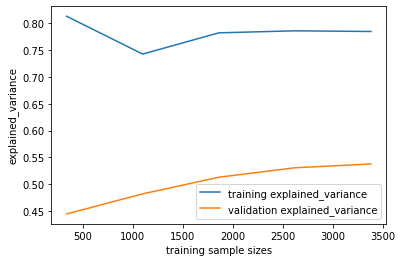

In [44]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training explained_variance')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation explained_variance')
plt.xlabel('training sample sizes')
plt.ylabel('explained_variance')
plt.legend()
# indicates overfiting and high variance
# Ovefiting occurs when: High training accuracy, low validation accuracy, Gap/Non-convergent trends between the training and validation curves=> Learnt from the noise.

## Lasso Regressor on Training Data

In [45]:
# Get the object of the Best Lasso Algorithm with the best params
be_Lasso = best_algos['Lasso']['best_estimator']

In [46]:
# View the model coeeficients
be_Lasso.named_steps['model'].coef_
# Zero value in the coefficients indicates multicollnear columns, these columns can be eliminated in the future selection process.

array([-0.00000000e+00, -1.05038294e+00,  1.98027688e+00,  6.90292541e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.77835065e+00, -2.23535901e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.09830665e+01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  8.29313394e+00,
        0.00000000e+00,  4.17657927e+00,  0.00000000e+00,  0.00000000e+00,
       -1.69868812e+00,  2.06472550e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.48057124e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.76286642e+00, -1.34489433e+01, -0.00000000e+00,
        2.01665773e+01, -

In [47]:
# View the model intercept
be_Lasso.named_steps['model'].intercept_

11.615967376628333

In [48]:
# Using SelectFromModel to select the features
#feature_sel_model = SelectFromModel(be_Lasso)
#feature_sel_model.fit(X, y)
#feature_sel_model.get_support()

## Model evaluation metrics Lasso Regressor

In [49]:
y_pred_Lasso = be_RF.predict(X)

In [50]:
## Mean of Predicted and True Targets
print("mean of Predicted values: ",np.mean(y_pred_Lasso, axis = None))
print("mean of True values: ",np.mean(y, axis = None))

mean of Predicted values:  82.89575425491685
mean of True values:  83.17977396449703


### Using explained_variance_score 
Also called adjusted R2. Best value is 1, values close to 0 means less effcient model  
If y_pred is the estimated target output, y the corresponding (correct) target output, and VAR is Variance, the square of the standard deviation, then the explained variance is estimated as 1-VAR(y-y_pred)/VAR(y) 

In [51]:
explained_variance_score(y, y_pred_Lasso)

0.7758446661049048

### Using max_error  
 max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value.

In [52]:
max_error(y, y_pred_Lasso)

635.6681694282008

## Using neg_root_mean_squared_error  
Sum of squareroot of Squared differences between the actual and predicted values divided by the number of samples  

In [56]:
mean_squared_error(y, y_pred_Lasso, squared=True)

970.2956197803339

### Using R2(r2_score)  
Best value is 1, values close to 0 means less effcient model  
If y_pred is the estimated target output, y the corresponding (correct) target output, and VAR is Variance, the square of the standard deviation, then the explained variance is estimated as 1-VAR(y-y_pred)/VAR(y-y_mean)  
Take VAR(y-y_mean) as the base line. which means y_mean as a constant prediction for all values of the features  

In [55]:
r2_score(y, y_pred_Lasso)

0.7758260290162082

## Fit evaluation using learning Curve

### learning curve for neg_mean_squared_error

In [57]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = be_Lasso,
X = X,
y = y, cv = 5,
scoring = 'neg_mean_squared_error') #optionally can pass train_sizes = train_sizes for custom training sizes

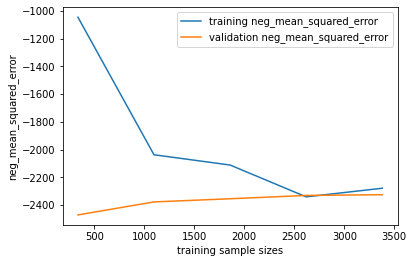

In [58]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training neg_mean_squared_error')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation neg_mean_squared_error')
plt.xlabel('training sample sizes')
plt.ylabel('neg_mean_squared_error')
plt.legend()
# indicates overfiting and high variance
# Ovefiting occurs when: High training accuracy, low validation accuracy, Gap/Non-convergent trends between the training and validation curves=> Learnt from the noise.

### learning curve for explained_variance

In [59]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = be_Lasso,
X = X,
y = y, cv = 5,
scoring = 'explained_variance') #optionally can pass train_sizes = train_sizes for custom training sizes

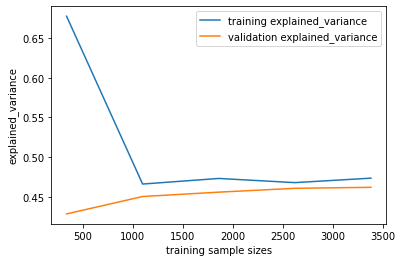

In [60]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='training explained_variance')
plt.plot(train_sizes, validation_scores.mean(axis=1),  label='validation explained_variance')
plt.xlabel('training sample sizes')
plt.ylabel('explained_variance')
plt.legend()
# indicates overfiting and high variance
# Ovefiting occurs when: High training accuracy, low validation accuracy, Gap/Non-convergent trends between the training and validation curves=> Learnt from the noise.

# Model Validation on Testing Data